In [2]:
from astropy.io import fits
import clevar
from clevar.match_metrics.recovery import ClCatalogFuncs as r_cf
from clevar.match_metrics.distances import ClCatalogFuncs as d_cf
from clevar.match_metrics.scaling import ClCatalogFuncs as s_cf
import clevar.match_metrics.scaling as scaling

import pandas as pd
from astropy.table import Table
import astropy
from matplotlib import pyplot as plt
import numpy as np
from numcosmo_py import Ncm, Nc
from numcosmo_py.external.pyssc import pyssc as PySSC
Ncm.cfg_init()

In [3]:
hdul_halos = fits.open("../halos/halos.fits")
hdul_amico = fits.open("JPAS_mock_cut_map_detections_refined_amico.fits")

table_halos = hdul_halos[1].data
table_amico = hdul_amico[1].data

logMmin = 13
logMmax = 15

table_halos = table_halos[(table_halos['upid'] == -1)  &  (table_halos['Mvir'] >= 10**logMmin) & (table_halos['Mvir'] <= 10**logMmax)]
table_halos['Mvir'] = table_halos['Mvir']/0.6774

print(table_halos.size)
print(table_amico.size)
table_amico.columns['Xphys'].name = 'RA'
table_amico.columns['Yphys'].name = 'DEC'
table_amico.columns['Zphys'].name = 'z'
print(table_amico.columns)

print("DEC max")
print(table_amico['DEC'].max())
print(table_halos['DEC'].max())
print('\n')
print("DEC min")
print(table_amico['DEC'].min())
print(table_halos['DEC'].min())
print('\n')
print("RA max")
print(table_amico['RA'].max())
print(table_halos['RA'].max())
print('\n')
print("RA min")
print(table_amico['RA'].min())
print(table_halos['RA'].min())
print('\n')
print("z max")
print(table_amico['z'].max())
print(table_halos['redshift_R'].max())
print('\n')
print("z min")
print(table_amico['z'].min())
print(table_halos['redshift_R'].min())

689973
59100
ColDefs(
    name = 'ID'; format = 'J'
    name = 'Xpix'; format = 'I'
    name = 'Ypix'; format = 'I'
    name = 'Zpix'; format = 'I'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'z'; format = 'E'
    name = 'SN'; format = 'D'
    name = 'SN_NO_CLUSTER'; format = 'D'
    name = 'AMP'; format = 'D'
    name = 'RICH'; format = 'D'
    name = 'LIKE'; format = 'D'
    name = 'MSKFRC'; format = 'I'
    name = 'POISS'; format = 'D'
    name = 'LAMB'; format = 'D'
    name = 'LAMBSTAR'; format = 'D'
    name = 'ZPIX_SIGM'; format = 'D'
    name = 'ZPIX_SIGP'; format = 'D'
    name = 'ZPHYS_SIGM'; format = 'D'
    name = 'ZPHYS_SIGP'; format = 'D'
    name = 'ODDS'; format = 'D'
    name = 'Pz-0'; format = 'D'
    name = 'Pz-1'; format = 'D'
    name = 'Pz-2'; format = 'D'
    name = 'Pz-3'; format = 'D'
    name = 'Pz-4'; format = 'D'
    name = 'Pz-5'; format = 'D'
    name = 'Pz-6'; format = 'D'
    name = 'Pz-7'; format = 'D'
    name = 'Pz-8'; form

## Lambdastar definition of richness ##


In [3]:
catalog_halos = clevar.ClCatalog('Halo catalog',ra=table_halos['RA'] ,dec=table_halos['DEC'] 
                                ,z=table_halos['redshift_R'], mass=table_halos['Mvir'])

catalog_amico = clevar.ClCatalog('Detection catalog', ra=table_amico['RA'], dec=table_amico['DEC'], mass=table_amico['LAMBSTAR'],z=table_amico['z'] )

/global/u2/l/lettieri/miniforge3/envs/numcosmo_developer/lib/python3.12/site-packages/clevar-0.15.3-py3.12.egg/clevar/catalog/tagdata.py:278: UserWarning: id column missing, additional one is being created.
  warnings.warn(f"{id_name} column missing, additional one is being created.")


In [4]:
mt = clevar.match.ProximityMatch()

match_config = {
    'type': 'cross', # options are cross, cat1, cat2
    'which_radius': 'max', # Case of radius to be used, can be: cat1, cat2, min, max
    'preference': 'redshift_proximity', # options are more_massive, angular_proximity or redshift_proximity
    'catalog1': {'delta_z':0.01,
                'match_radius': '100 arcsec'
                },
    'catalog2': {'delta_z':0.01,
                'match_radius': '100 arcsec'
                }
}

cosmo_astropy = clevar.cosmology.AstroPyCosmology()

mt.match_from_config(catalog_halos, catalog_amico, match_config, cosmo=cosmo_astropy)
mt.save_matches(catalog_halos, catalog_amico, out_dir='temp_lambstar', overwrite=True)


## ClCatalog 1
## Prep mt_cols
### Prep z_cols
* zmin|zmax from config value
### Prep ang_cols
* ang radius from set scale

## ClCatalog 2
## Prep mt_cols
### Prep z_cols
* zmin|zmax from config value
### Prep ang_cols
* ang radius from set scale

## Multiple match (catalog 1)
Finding candidates (Halo catalog)
* 10,604/689,973 objects matched.

## Multiple match (catalog 2)
Finding candidates (Detection catalog)
* 10,730/59,100 objects matched.

## Finding unique matches of catalog 1
Unique Matches (Halo catalog)
* 10,235/689,973 objects matched.

## Finding unique matches of catalog 2
Unique Matches (Detection catalog)
* 10,235/59,100 objects matched.
Cross Matches (Halo catalog)
* 10,234/689,973 objects matched.
Cross Matches (Detection catalog)
* 10,234/59,100 objects matched.


In [4]:
catalog_halos = clevar.ClCatalog('Halo catalog',ra=table_halos['RA'] ,dec=table_halos['DEC'] 
                                ,z=table_halos['redshift_R'], mass=table_halos['Mvir'])

catalog_amico = clevar.ClCatalog('Detection catalog', ra=table_amico['RA'], dec=table_amico['DEC'], mass=table_amico['LAMBSTAR'],z=table_amico['z'] )
mt = clevar.match.ProximityMatch()
mt.load_matches(catalog_halos, catalog_amico, out_dir='temp_lambstar')

halos_match, detections_match = clevar.match.get_matched_pairs(catalog_halos, catalog_amico, 'cross')

/global/u2/l/lettieri/miniforge3/envs/numcosmo_developer/lib/python3.12/site-packages/clevar-0.15.3-py3.12.egg/clevar/catalog/tagdata.py:278: UserWarning: id column missing, additional one is being created.
  warnings.warn(f"{id_name} column missing, additional one is being created.")


Halo catalog
    * ClEvar used in matching: 0.15.3
 * Total objects:    689,973
 * multiple (self):  10,604
 * multiple (other): 10,604
 * unique (self):    10,235
 * unique (other):   10,235
 * cross:            10,234

Detection catalog
    * ClEvar used in matching: 0.15.3
 * Total objects:    59,100
 * multiple (self):  10,730
 * multiple (other): 10,730
 * unique (self):    10,235
 * unique (other):   10,235
 * cross:            10,234


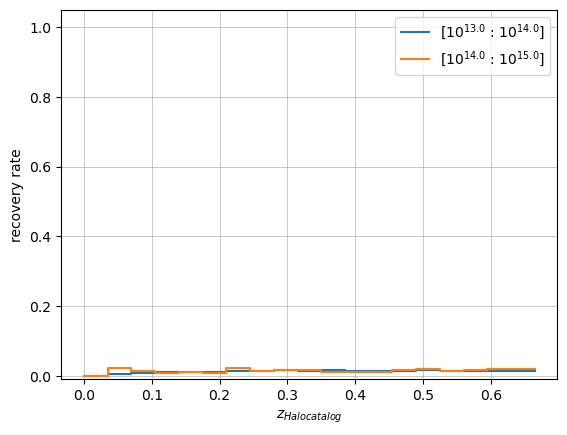

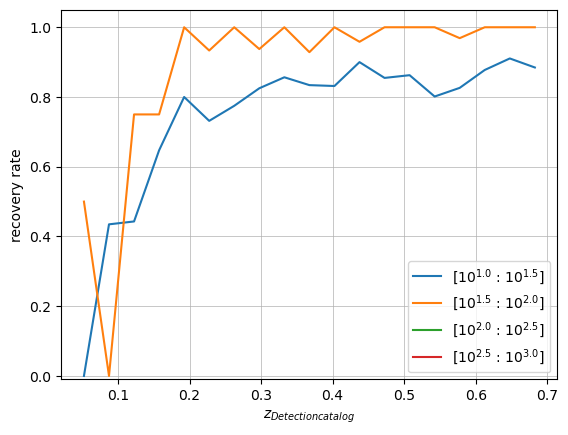

<Figure size 640x480 with 0 Axes>

In [6]:
from clevar.match_metrics import recovery

zbins = np.linspace(0, 0.7, 21)
mbins = np.logspace(13, 15, 3)
rbins = np.logspace(1 , 3 , 5)
info = recovery.plot(catalog_halos, 'cross', zbins, mbins, shape='steps')
plt.show()
plt.savefig("recovery_halos.jpg")
info = recovery.plot(catalog_amico, 'cross', zbins, rbins, shape='line')
plt.show()
plt.savefig("recovery_detections.jpg")

## Lambda definition of richness ##

In [5]:
catalog_halos = clevar.ClCatalog('Halo catalog',ra=table_halos['RA'] ,dec=table_halos['DEC'] 
                                ,z=table_halos['redshift_R'], mass=table_halos['Mvir'])

catalog_amico = clevar.ClCatalog('Detection catalog', ra=table_amico['RA'], dec=table_amico['DEC'], mass=table_amico['LAMB'],z=table_amico['z'] )

/global/u2/l/lettieri/miniforge3/envs/numcosmo_developer/lib/python3.12/site-packages/clevar-0.15.3-py3.12.egg/clevar/catalog/tagdata.py:278: UserWarning: id column missing, additional one is being created.
  warnings.warn(f"{id_name} column missing, additional one is being created.")


In [6]:
mt = clevar.match.ProximityMatch()

match_config = {
    'type': 'cross', # options are cross, cat1, cat2
    'which_radius': 'max', # Case of radius to be used, can be: cat1, cat2, min, max
    'preference': 'redshift_proximity', # options are more_massive, angular_proximity or redshift_proximity
    'catalog1': {'delta_z':0.01,
                'match_radius': '100 arcsec'
                },
    'catalog2': {'delta_z':0.01,
                'match_radius': '100 arcsec'
                }
}

cosmo_astropy = clevar.cosmology.AstroPyCosmology()

mt.match_from_config(catalog_halos, catalog_amico, match_config, cosmo=cosmo_astropy)
mt.save_matches(catalog_halos, catalog_amico, out_dir='temp_lamb', overwrite=True)


## ClCatalog 1
## Prep mt_cols
### Prep z_cols
* zmin|zmax from config value
### Prep ang_cols
* ang radius from set scale

## ClCatalog 2
## Prep mt_cols
### Prep z_cols
* zmin|zmax from config value
### Prep ang_cols
* ang radius from set scale

## Multiple match (catalog 1)
Finding candidates (Halo catalog)
* 10,604/689,973 objects matched.

## Multiple match (catalog 2)
Finding candidates (Detection catalog)
* 10,730/59,100 objects matched.

## Finding unique matches of catalog 1
Unique Matches (Halo catalog)
* 10,235/689,973 objects matched.

## Finding unique matches of catalog 2
Unique Matches (Detection catalog)
* 10,235/59,100 objects matched.
Cross Matches (Halo catalog)
* 10,234/689,973 objects matched.
Cross Matches (Detection catalog)
* 10,234/59,100 objects matched.
